In [1]:
# 라이브러리 임포트
import os
import numpy as np
import pandas as pd
import chardet

# 사용자 정의함수 경로 설정
import sys
sys.path.append("G:/내 드라이브/Source/_Custom_Function")
# 사용자 정의함수 불러오기

import time

import folium

import ExcelFile_Merge as em
import ExcelFile_Read as er
import ExcelFile_EDA as ee

import dataset_function as ds_f
import folium_function as fl_f

## 1. 2023년 유동인구

In [3]:
import time
import pandas as  pd

filepath = 'G:\\내 드라이브\\DataSet\\_파킷 파일\\_연도별 자치구별 여러변수와 자전거 이용량\\'
filename = '연도별 자치구별 출퇴근 이동인구 2020-2024.parquet'
start_time = time.time()
df_popul = pd.read_parquet(filepath + filename)
print("read_parquet time :", time.time() - start_time)
df_popul.head(5)

read_parquet time : 0.08030939102172852


,연도,출퇴근,자치구,이동인구
0,2020,출근,강남구,42087137.37
1,2020,출근,강동구,8690787.78
2,2020,출근,강북구,4228968.36
3,2020,출근,강서구,12350053.62
4,2020,출근,관악구,6552387.52


In [4]:
df_popul = df_popul[df_popul['연도'] == '2023']
df_popul

,연도,출퇴근,자치구,이동인구
150,2023,출근,강남구,59662981.37
151,2023,출근,강동구,16964630.85
152,2023,출근,강북구,8004995.05
153,2023,출근,강서구,21525237.60
154,2023,출근,관악구,12082737.69
155,2023,출근,광진구,11386971.57
156,2023,출근,구로구,16225529.38
157,2023,출근,금천구,14663805.24
158,2023,출근,노원구,14622545.29
159,2023,출근,도봉구,7210857.33


In [5]:
move = df_popul.groupby('자치구')['이동인구'].sum().reset_index()
move

,자치구,이동인구
0,강남구,87024272.60
1,강동구,43947861.78
2,강북구,21822438.86
3,강서구,46790834.18
4,관악구,33869079.88
5,광진구,29406342.79
6,구로구,35981143.44
7,금천구,24365804.90
8,노원구,38989836.86
9,도봉구,20741386.03


In [6]:
move.sort_values(by='이동인구', ascending=False)

,자치구,이동인구
0,강남구,87024272.60
17,송파구,65528214.34
14,서초구,57013741.38
19,영등포구,56280754.42
3,강서구,46790834.18
1,강동구,43947861.78
23,중구,41966121.38
8,노원구,38989836.86
12,마포구,38728478.42
6,구로구,35981143.44


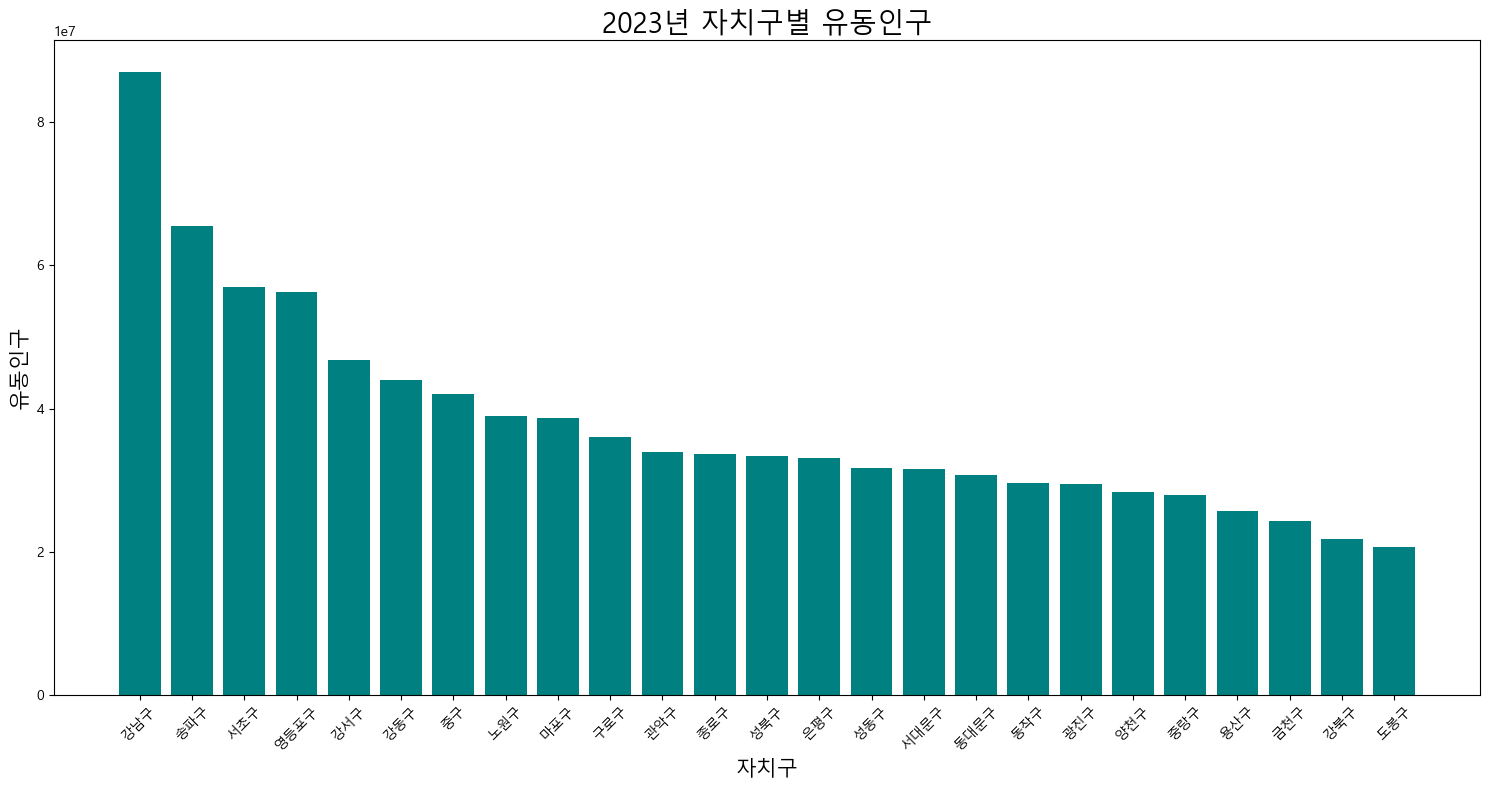

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 이동인구 기준으로 내림차순 정렬
sorted_move = move.sort_values(by='이동인구', ascending=False)

# 그래프 크기 설정
plt.figure(figsize=(15, 8))

# 자치구별 유동인구 막대 그래프
plt.bar(sorted_move['자치구'], sorted_move['이동인구'], color='teal')

# 그래프 설정
plt.xlabel('자치구', fontsize=15)
plt.ylabel('유동인구', fontsize=15)
plt.title('2023년 자치구별 유동인구', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()

In [8]:
import pandas as pd
import numpy as np
import json

import folium

In [9]:
# 나의 루트 경로 설정
path_dateset = 'G:/내 드라이브/DataSet/'

In [10]:
rental = pd.read_parquet(path_dateset + '_파킷 파일\\서울시 공공자전거 대여소 정보\\공공자전거 대여소 정보_통합본_최종.parquet')
rental.head()

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,데이터등록월,대여소ID,거치대수
0,06173,서울자동차운전전문학원,강서구,강서구 남부순환로 216,37.546135,126.821060,2024-03-18,NaN,10.0,QR,2024-06,ST-3284,NaN
1,02902,공릉풍림아파트 108동,노원구,서울특별시 노원구 섬밭로 139 공릉풍림아파트,37.628620,127.066910,2020-03-24,NaN,12.0,QR,2024-06,ST-2068,NaN
2,02912,대진고등학교,노원구,서울특별시 노원구 한글비석로 97,37.638157,127.073265,2020-03-23,NaN,20.0,QR,2024-06,ST-2078,NaN
3,02911,상계역중앙시장,노원구,서울특별시 노원구 한글비석로 389-2 가로판매대,37.658871,127.071915,2020-03-23,NaN,7.0,QR,2024-06,ST-2077,NaN
4,02910,도깨비시장,노원구,서울특별시 노원구 동일로 1028 한의학명가,37.621864,127.074051,2020-03-25,NaN,10.0,QR,2024-06,None,NaN


In [11]:
import ast

text = '"\ub3c4\ubd09\uad6c"'
decoded_text = ast.literal_eval(text)
print(decoded_text)

도봉구


## 2. 2023년 부족량 TOP 20

In [13]:
_year='2023'

In [14]:
import time
import pandas as  pd

filepath = 'G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\'
filename = '출퇴근대여반납차이_' + _year + '.parquet'
start_time = time.time()
df_shortage = pd.read_parquet(filepath + filename)
print("read_parquet time :", time.time() - start_time)
df_shortage.head(5)

read_parquet time : 0.01610088348388672


,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도
0,00003,NaN,536.0,NaN,10.0,None,None,NaN,NaN
1,00005,NaN,20.0,NaN,5.0,None,None,NaN,NaN
2,00102,2057.0,1968.0,4286.0,5301.0,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629
3,00103,1121.0,1441.0,3217.0,4540.0,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835
4,00104,919.0,1555.0,2691.0,2292.0,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986


In [15]:
df_shortage = df_shortage.dropna(subset=['대여소명', '위도', '경도', '출근대여수', '퇴근반납수'])
df_shortage

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도
2,00102,2057.0,1968.0,4286.0,5301.0,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629
3,00103,1121.0,1441.0,3217.0,4540.0,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835
4,00104,919.0,1555.0,2691.0,2292.0,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986
5,00105,252.0,285.0,1374.0,1409.0,합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825
6,00106,1093.0,1307.0,3746.0,4436.0,합정역 7번출구 앞,서울특별시 마포구 독막로 4,37.548645,126.912826
...,...,...,...,...,...,...,...,...,...
2782,05871,470.0,69.0,264.0,332.0,건영상가 앞,도림로323,37.506119,126.901611
2783,06053,133.0,145.0,373.0,271.0,중부세무서 앞,서울특별시 중구 남학동 12-1,37.560925,126.990662
2784,06054,2159.0,529.0,1032.0,2236.0,청구e편한세상아파트 113동 앞,신당동 44-40,37.561043,127.018211
2785,06055,222.0,413.0,367.0,172.0,한국경제,중구 청파로 463,37.560627,126.967682


In [16]:
df_shortage['퇴근반납수-출근대여수'] = df_shortage['퇴근반납수'] - df_shortage['출근대여수']
top_20_short = df_shortage.nlargest(20, '퇴근반납수-출근대여수')
top_20_short

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도,퇴근반납수-출근대여수
1773,02728,14718.0,13315.0,16771.0,31336.0,마곡나루역 3번 출구,강서구 마곡동 372-23,37.565804,126.828079,16618.0
806,01153,6944.0,5944.0,13262.0,22085.0,"발산역 1번, 9번 인근 대여소",서울특별시 강서구 공항대로 281,37.558949,126.837174,15141.0
2290,04217,2851.0,2141.0,8058.0,12551.0,한강공원 망원나들목,마포구 망원동 462-8,37.555576,126.896889,9700.0
2770,05858,6965.0,4436.0,5734.0,16228.0,영등포역5번출구,경인로 846,37.516693,126.908073,9263.0
1413,02102,3928.0,6141.0,9493.0,12535.0,봉림교 교통섬,서울특별시 관악구 관천로 52,37.484085,126.926888,8607.0
2462,04565,2119.0,4335.0,9579.0,9714.0,영등포 신세계백화점,영등포구 영등포4가 442-6,37.518036,126.903648,7595.0
525,00765,3499.0,5777.0,8909.0,11051.0,오목교역 3번출구,서울특별시 양천구 목동동로 270,37.524776,126.875481,7552.0
546,00792,1764.0,7136.0,9886.0,8300.0,목동트라팰리스 웨스턴에비뉴,오목로299(이마트 출입구측),37.525372,126.870926,6536.0
509,00746,1636.0,1962.0,5714.0,7543.0,목동2단지 상가,서울특별시 양천구 목동 902-5,37.536503,126.877747,5907.0
334,00502,6446.0,10696.0,11585.0,12223.0,뚝섬유원지역 1번출구 앞,서울특별시 광진구 능동로 10 뚝섬유원지역 1번출구 앞,37.531860,127.067192,5777.0


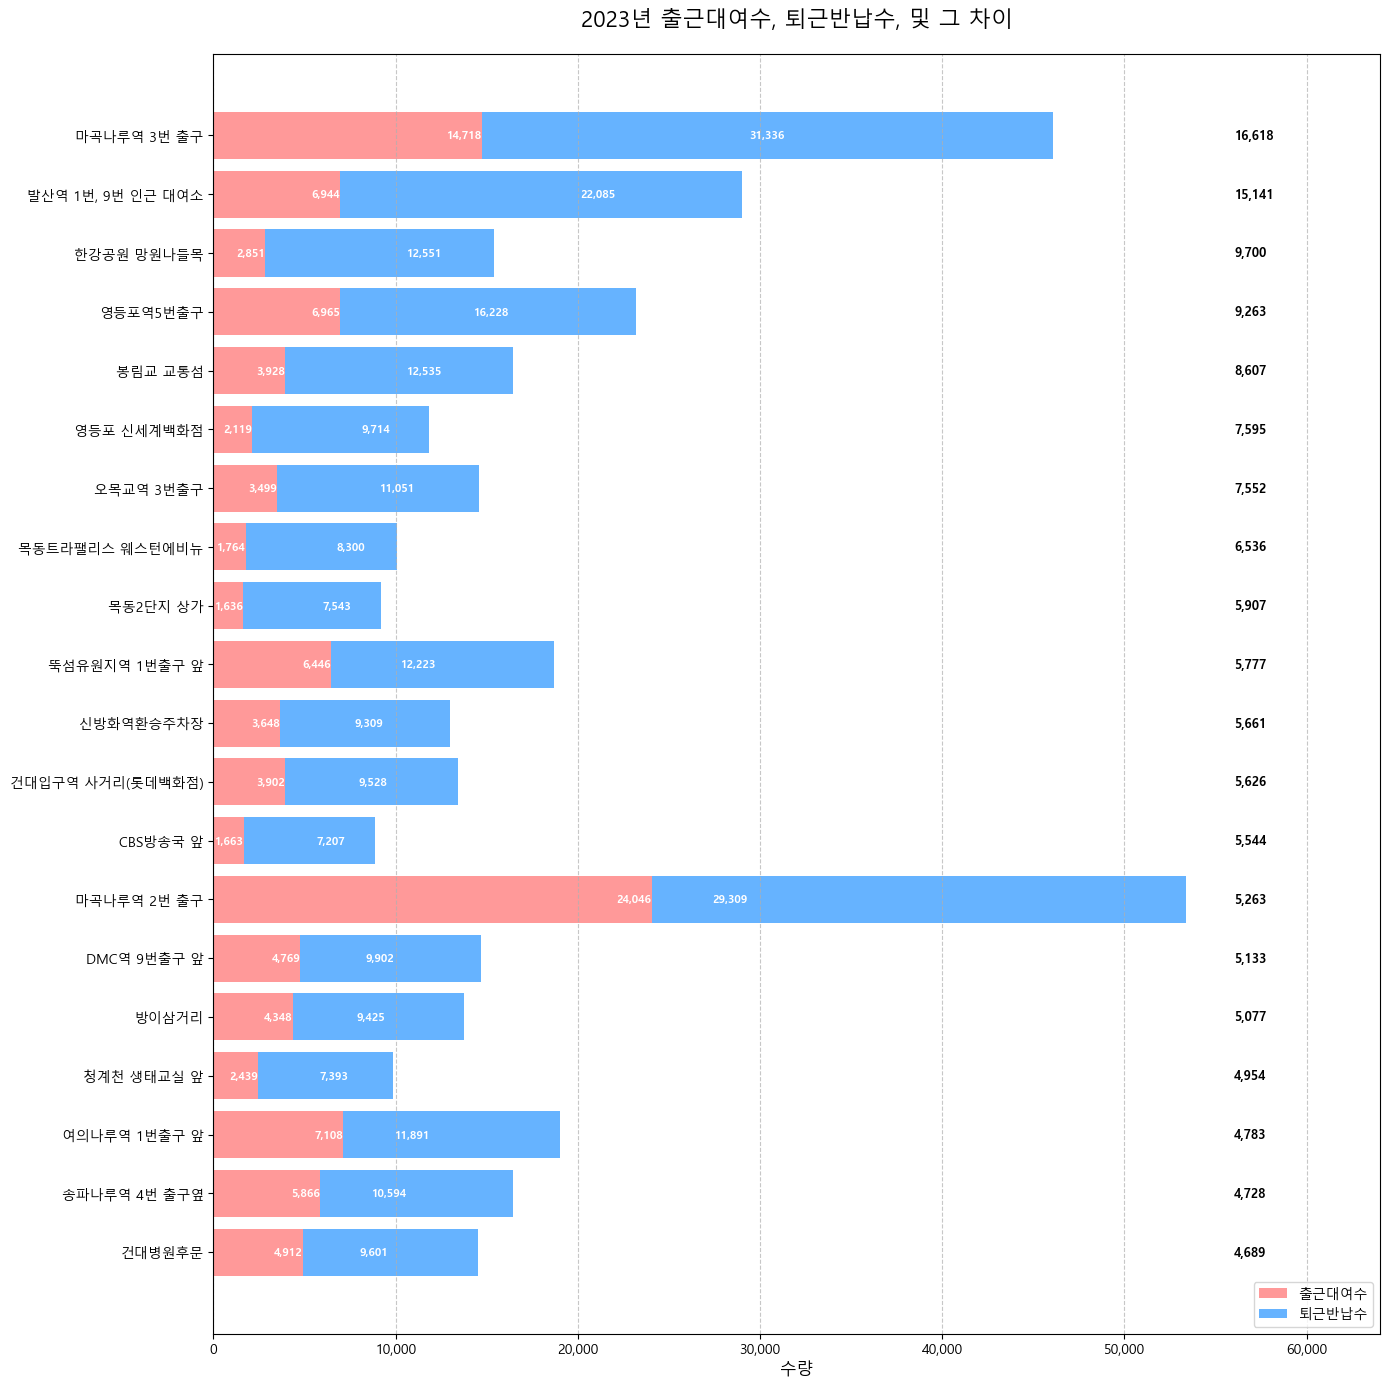

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 한글 폰트 설정 (Windows: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 그래프 생성 (가로 세로 비율 조정)
fig, ax = plt.subplots(figsize=(14, 14))  # 가로 길이를 늘림

# 데이터 정렬 및 차이 계산
top_20_sorted = top_20_short.sort_values('퇴근반납수-출근대여수', ascending=True)
top_20_sorted['차이'] = top_20_sorted['퇴근반납수'] - top_20_sorted['출근대여수']

# 색상 설정
colors = ['#ff9999', '#66b3ff']

# 막대 그리기
ax.barh(top_20_sorted['대여소명'], top_20_sorted['출근대여수'], label='출근대여수', color=colors[0])
ax.barh(top_20_sorted['대여소명'], top_20_sorted['퇴근반납수'], left=top_20_sorted['출근대여수'], label='퇴근반납수', color=colors[1])

# 그래프 스타일링
ax.set_xlabel('수량', fontsize=12)
ax.set_title('2023년 출근대여수, 퇴근반납수, 및 그 차이', fontsize=16, pad=20)
ax.legend(loc='lower right', fontsize=10)

# y축 레이블 정렬
plt.yticks(rotation=0, ha='right')

# x축에 천 단위 구분자 추가
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# 그리드 추가
ax.grid(axis='x', linestyle='--', alpha=0.7)

# 각 막대에 값 표시
def add_value_labels(bars):
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(width):,}',
                ha='right', va='center', fontweight='bold', fontsize=8, color='white')

bars1 = ax.barh(top_20_sorted['대여소명'], top_20_sorted['출근대여수'], color=colors[0])
bars2 = ax.barh(top_20_sorted['대여소명'], top_20_sorted['퇴근반납수'], left=top_20_sorted['출근대여수'], color=colors[1])

add_value_labels(bars1)
add_value_labels(bars2)

# 차이 값 표시 (가장 오른쪽에)
max_value = top_20_sorted[['출근대여수', '퇴근반납수']].sum(axis=1).max()
for i, value in enumerate(top_20_sorted['차이']):
    ax.text(max_value * 1.05, i, f'{int(value):,}', 
            va='center', ha='left', fontweight='bold', fontsize=9)

# x축 범위 조정
ax.set_xlim(0, max_value * 1.2)

plt.tight_layout()
plt.show()

## 3. 거치대수량 '0' TOP 20

In [19]:
import time
import pandas as pd

filepath = 'G:\\내 드라이브\\DataSet\\서울특별시 대여소별 공공자전거 대여가능 수량(1시간 단위)\\23년\\'
filename = '서울특별시 대여소별 공공자전거 대여가능 수량(1시간 단위)_2023.parquet'

start_time = time.time()
df_0 = pd.read_parquet(filepath + filename)  # encoding 파라미터 제거
print("read_parquet time :", time.time() - start_time)
df_0.head()

read_parquet time : 2.323869228363037


,일시,대여소번호,대여소명,시간대,거치대수량
0,2023-03-01,102,102. 망원역 1번출구 앞,0,22
1,2023-03-01,102,102. 망원역 1번출구 앞,1,19
2,2023-03-01,102,102. 망원역 1번출구 앞,2,23
3,2023-03-01,102,102. 망원역 1번출구 앞,3,23
4,2023-03-01,102,102. 망원역 1번출구 앞,4,25


In [20]:
df_0['일시'] = pd.to_datetime(df_0['일시'], format='%Y-%m-%d')
df_0

,일시,대여소번호,대여소명,시간대,거치대수량
0,2023-03-01,102,102. 망원역 1번출구 앞,0,22
1,2023-03-01,102,102. 망원역 1번출구 앞,1,19
2,2023-03-01,102,102. 망원역 1번출구 앞,2,23
3,2023-03-01,102,102. 망원역 1번출구 앞,3,23
4,2023-03-01,102,102. 망원역 1번출구 앞,4,25
...,...,...,...,...,...
20114412,2023-04-15,6054,6054.청구e편한세상아파트 113동 앞,19,10
20114413,2023-04-15,6054,6054.청구e편한세상아파트 113동 앞,20,13
20114414,2023-04-15,6054,6054.청구e편한세상아파트 113동 앞,21,14
20114415,2023-04-15,6054,6054.청구e편한세상아파트 113동 앞,22,14


In [21]:
# dt.weekday : 요일 정보를 숫자로 추출 
df_0['요일_인덱스'] = df_0['일시'].dt.weekday

# 0~6번 인덱스 위치에 각 한글 요일 이름이 담긴 리스트
weekday_list = ['월', '화', '수', '목', '금', '토', '일']

# apply 함수로 숫자 -> 요일 이름으로 변환
df_0['요일'] = df_0.apply(lambda x : weekday_list[x['요일_인덱스']], axis=1)

# 요일이 월~금이고 거치대수량이 '0' 데이터만 필터링
df_0_day = df_0[df_0['요일'].isin(['월', '화', '수', '목', '금']) & (df_0['거치대수량'] == 0)]
df_0_day

,일시,대여소번호,대여소명,시간대,거치대수량,요일_인덱스,요일
52,2023-03-01,104,104. 합정역 1번출구 앞,4,0,2,수
53,2023-03-01,104,104. 합정역 1번출구 앞,5,0,2,수
146,2023-03-01,108,108. 서교동 사거리,2,0,2,수
147,2023-03-01,108,108. 서교동 사거리,3,0,2,수
149,2023-03-01,108,108. 서교동 사거리,5,0,2,수
...,...,...,...,...,...,...,...
20050311,2023-04-14,6053,6053. 중부세무서 앞,22,0,4,금
20050312,2023-04-14,6053,6053. 중부세무서 앞,23,0,4,금
20050324,2023-04-14,6054,6054.청구e편한세상아파트 113동 앞,11,0,4,금
20050328,2023-04-14,6054,6054.청구e편한세상아파트 113동 앞,15,0,4,금


In [22]:
df_0_time = df_0_day[(df_0_day['시간대'].isin([7, 8, 17, 18]))]
df_0_time

,일시,대여소번호,대여소명,시간대,거치대수량,요일_인덱스,요일
151,2023-03-01,108,108. 서교동 사거리,7,0,2,수
234,2023-03-01,112,112. 극동방송국 앞,18,0,2,수
450,2023-03-01,122,122. 신성기사식당 앞,18,0,2,수
751,2023-03-01,137,137. 신촌기차역입구 교차로,7,0,2,수
752,2023-03-01,137,137. 신촌기차역입구 교차로,8,0,2,수
...,...,...,...,...,...,...,...
20049985,2023-04-14,5852,5852. 대림동현대2차 201동 앞,8,0,4,금
20050043,2023-04-14,5854,5854. 신한금융투자 앞,18,0,4,금
20050067,2023-04-14,5855,5855. 하이투자증권 앞,18,0,4,금
20050128,2023-04-14,5859,5859. 여의도 삼부아파트,7,0,4,금


In [23]:
zero_st_counts = df_0_time[df_0_time['거치대수량'] == 0].groupby(['대여소번호', '대여소명']).size().reset_index(name='거치대수량_0_개수').sort_values(by='거치대수량_0_개수', ascending=False).reset_index(drop=True)
zero_st_counts

,대여소번호,대여소명,거치대수량_0_개수
0,3527,3527. 왕십리 자이아파트(101동 앞),770
1,764,764. 목동청소년수련관,753
2,1568,1568.4.19민주묘지 입구사거리,750
3,2298,2298. 래미안서초스위트앞,748
4,790,790.화곡고가 사거리,746
...,...,...,...
2751,1054,1054. 말우물 어린이 공원,1
2752,1031,1031. 올림픽로 836(아리수로),1
2753,1004,1004. 삼성광나루아파트 버스정류장,1
2754,996,996.응암역2번출구 국민은행 앞,1


In [24]:
zero_st_counts['대여소번호'] = zero_st_counts['대여소번호'].astype(str).str.zfill(5)
zero_st_counts

,대여소번호,대여소명,거치대수량_0_개수
0,03527,3527. 왕십리 자이아파트(101동 앞),770
1,00764,764. 목동청소년수련관,753
2,01568,1568.4.19민주묘지 입구사거리,750
3,02298,2298. 래미안서초스위트앞,748
4,00790,790.화곡고가 사거리,746
...,...,...,...
2751,01054,1054. 말우물 어린이 공원,1
2752,01031,1031. 올림픽로 836(아리수로),1
2753,01004,1004. 삼성광나루아파트 버스정류장,1
2754,00996,996.응암역2번출구 국민은행 앞,1


In [25]:
import pandas as pd
import numpy as np
import json

import folium

# 나의 루트 경로 설정
path_dateset = 'G:/내 드라이브/DataSet/'

rental = pd.read_parquet(path_dateset + '_파킷 파일\\서울시 공공자전거 대여소 정보\\공공자전거 대여소 정보_통합본_최종.parquet')
rental.head()

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,데이터등록월,대여소ID,거치대수
0,06173,서울자동차운전전문학원,강서구,강서구 남부순환로 216,37.546135,126.821060,2024-03-18,NaN,10.0,QR,2024-06,ST-3284,NaN
1,02902,공릉풍림아파트 108동,노원구,서울특별시 노원구 섬밭로 139 공릉풍림아파트,37.628620,127.066910,2020-03-24,NaN,12.0,QR,2024-06,ST-2068,NaN
2,02912,대진고등학교,노원구,서울특별시 노원구 한글비석로 97,37.638157,127.073265,2020-03-23,NaN,20.0,QR,2024-06,ST-2078,NaN
3,02911,상계역중앙시장,노원구,서울특별시 노원구 한글비석로 389-2 가로판매대,37.658871,127.071915,2020-03-23,NaN,7.0,QR,2024-06,ST-2077,NaN
4,02910,도깨비시장,노원구,서울특별시 노원구 동일로 1028 한의학명가,37.621864,127.074051,2020-03-25,NaN,10.0,QR,2024-06,None,NaN


In [26]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2960 entries, 0 to 2959
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   2960 non-null   object 
 1   대여소명    2960 non-null   object 
 2   자치구     2960 non-null   object 
 3   상세주소    2960 non-null   object 
 4   위도      2959 non-null   float64
 5   경도      2959 non-null   float64
 6   설치시기    2921 non-null   object 
 7   LCD     1517 non-null   float64
 8   QR      1752 non-null   float64
 9   운영방식    2921 non-null   object 
 10  데이터등록월  2921 non-null   object 
 11  대여소ID   2701 non-null   object 
 12  거치대수    39 non-null     float64
dtypes: float64(5), object(8)
memory usage: 300.8+ KB


In [27]:
zero_st_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756 entries, 0 to 2755
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   대여소번호       2756 non-null   object
 1   대여소명        2756 non-null   object
 2   거치대수량_0_개수  2756 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 64.7+ KB


In [28]:
zero_st_counts_2 = pd.merge(zero_st_counts, rental, on='대여소번호', how='left')
zero_st_counts_2

,대여소번호,대여소명_x,거치대수량_0_개수,대여소명_y,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,데이터등록월,대여소ID,거치대수
0,03527,3527. 왕십리 자이아파트(101동 앞),770,왕십리 자이아파트(101동 앞),성동구,서울특별시 성동구 난계로 100 왕십리 자이아파트 103동 인근,37.561790,127.024391,2018-10-24,5.0,NaN,LCD,2024-06,ST-1601,NaN
1,00764,764. 목동청소년수련관,753,목동청소년수련관,양천구,양천구 목동동로 323,37.531029,126.875893,2018-10-26,30.0,NaN,LCD,2024-06,None,NaN
2,01568,1568.4.19민주묘지 입구사거리,750,4.19민주묘지 입구사거리,강북구,서울특별시 강북구 삼양로 504 광리빌딩,37.647934,127.014572,2020-03-25,NaN,10.0,QR,2024-06,ST-2136,NaN
3,02298,2298. 래미안서초스위트앞,748,래미안서초스위트앞,서초구,서울특별시 서초구 서운로 221,37.502411,127.021607,2018-02-26,12.0,NaN,LCD,2024-06,None,NaN
4,00790,790.화곡고가 사거리,746,화곡고가 사거리,양천구,양천구 신월동 455-5,37.527607,126.848755,2020-03-11,NaN,30.0,QR,2024-06,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751,01054,1054. 말우물 어린이 공원,1,말우물 어린이 공원,강동구,상일로 27길 14-7,37.560028,127.169678,2018-09-03,5.0,NaN,LCD,2024-06,ST-1595,NaN
2752,01031,1031. 올림픽로 836(아리수로),1,올림픽로 836(아리수로),강동구,서울특별시 암사동 440-13,37.555820,127.129913,2017-11-01,15.0,NaN,LCD,2024-06,ST-1048,NaN
2753,01004,1004. 삼성광나루아파트 버스정류장,1,삼성광나루아파트 버스정류장,강동구,서울특별시 강동구 상암로3길 77,37.553329,127.128868,2017-04-19,10.0,NaN,LCD,2024-06,ST-488,NaN
2754,00996,996.응암역2번출구 국민은행 앞,1,응암역2번출구 국민은행 앞,은평구,서울특별시 은평구 연서로 9 센타폴리스,37.599968,126.915726,2020-04-10,NaN,10.0,QR,2024-06,ST-2264,NaN


In [29]:
zero_st_counts_top_20 = zero_st_counts_2.head(20)
zero_st_counts_top_20.rename(columns={'대여소명_y': '대여소명'})

,대여소번호,대여소명_x,거치대수량_0_개수,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,데이터등록월,대여소ID,거치대수
0,03527,3527. 왕십리 자이아파트(101동 앞),770,왕십리 자이아파트(101동 앞),성동구,서울특별시 성동구 난계로 100 왕십리 자이아파트 103동 인근,37.561790,127.024391,2018-10-24,5.0,NaN,LCD,2024-06,ST-1601,NaN
1,00764,764. 목동청소년수련관,753,목동청소년수련관,양천구,양천구 목동동로 323,37.531029,126.875893,2018-10-26,30.0,NaN,LCD,2024-06,None,NaN
2,01568,1568.4.19민주묘지 입구사거리,750,4.19민주묘지 입구사거리,강북구,서울특별시 강북구 삼양로 504 광리빌딩,37.647934,127.014572,2020-03-25,NaN,10.0,QR,2024-06,ST-2136,NaN
3,02298,2298. 래미안서초스위트앞,748,래미안서초스위트앞,서초구,서울특별시 서초구 서운로 221,37.502411,127.021607,2018-02-26,12.0,NaN,LCD,2024-06,None,NaN
4,00790,790.화곡고가 사거리,746,화곡고가 사거리,양천구,양천구 신월동 455-5,37.527607,126.848755,2020-03-11,NaN,30.0,QR,2024-06,None,NaN
5,03779,3779. 유광사여성병원,746,유광사여성병원,강서구,강서로191,37.543240,126.838631,2020-11-24,NaN,10.0,QR,2024-06,None,NaN
6,03605,3605. 봉은사역6번출구(현대아이파크타워앞),746,봉은사역6번출구(현대아이파크타워앞),강남구,삼성동160,37.513908,127.060730,2021-02-23,NaN,10.0,QR,2024-06,None,NaN
7,03788,3788. 정곡나들목,746,정곡나들목,강서구,강서구 방화동 57-5번지,37.584171,126.819328,2020-11-10,NaN,15.0,QR,2024-06,None,NaN
8,00253,253. 신풍역 5번출구 인근,746,신풍역 5번출구 인근,영등포구,서울특별시 영등포구 신길동3596,37.500648,126.909515,2016-06-29,10.0,NaN,LCD,2024-06,None,NaN
9,04590,4590. KRX한국거래소(2),746,KRX한국거래소(2),영등포구,영등포구 여의나루로 76,37.524105,126.928108,2021-07-23,NaN,20.0,QR,2024-06,None,NaN


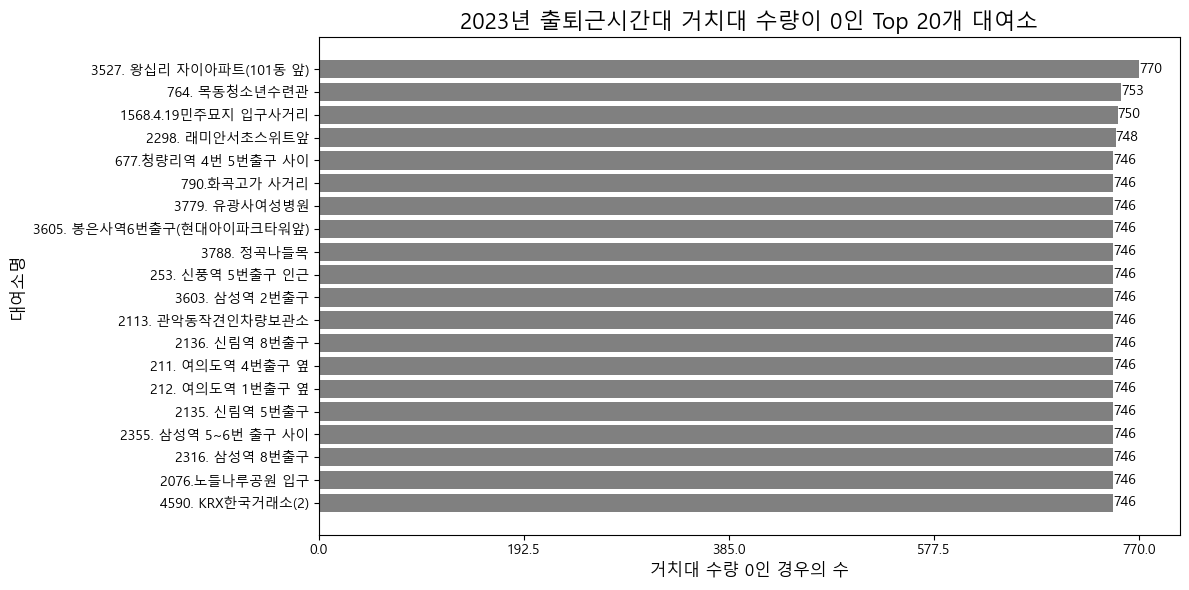

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정 (맑은 고딕 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터프레임을 거치대수량_0_개수 기준으로 내림차순 정렬 및 인덱스 재설정
sorted_df = zero_st_counts_top_20.sort_values(by='거치대수량_0_개수', ascending=True).reset_index(drop=True)

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 가로 막대 그래프 그리기
plt.barh(sorted_df['대여소명_x'], sorted_df['거치대수량_0_개수'], color='grey')

# 그래프 제목
plt.title('2023년 출퇴근시간대 거치대 수량이 0인 Top 20개 대여소', fontsize=16)

# x축 레이블
plt.xlabel('거치대 수량 0인 경우의 수', fontsize=12)

# y축 레이블
plt.ylabel('대여소명', fontsize=12)

# x축 눈금을 최대 값 기준으로 5개로 제한
max_value = sorted_df['거치대수량_0_개수'].max()
plt.xticks(np.linspace(0, max_value, 5))

# 각 막대 옆에 값 표시
for i, v in enumerate(sorted_df['거치대수량_0_개수']):
    plt.text(v, i, str(v), ha='left', va='center')

# 그래프 표시
plt.tight_layout()
plt.show()

## 4. 이용량 많은 곳 TOP 20

In [32]:
_year='2023'

In [33]:
import time
import pandas as  pd

filepath = 'G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\'
filename = '서울특별시 공공자전거 대여이력 정보_' + _year + '_preprocessed.parquet'
start_time = time.time()
df_many = pd.read_parquet(filepath + filename)
print("read_parquet time :", time.time() - start_time)
df_many.head(5)

read_parquet time : 41.24311566352844


,자전거번호,대여대여소번호,대여대여소명,대여거치대,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),대여일자,대여시간,반납일자,반납시간,대여시간차,이용시간-대여시간차,이용속도(km/h)
0,SPB-39194,01554,번동사거리,0,01554,번동사거리,0,0,0.00,2023-01-01,00:02:13,2023-01-01,00:02:43,0 days 00:00:30,-0.500000,NaN
1,SPB-43457,01653,노원역1번출구,0,04003,상계초교 입구 교차로 명주빌딩 앞,0,2,0.00,2023-01-01,00:01:20,2023-01-01,00:03:28,0 days 00:02:08,-0.133333,0.00000
2,SPB-44383,02601,석촌호수 아뜰리에,0,02601,석촌호수 아뜰리에,0,0,0.00,2023-01-01,00:04:01,2023-01-01,00:04:21,0 days 00:00:20,-0.333333,NaN
3,SPB-37186,01080,엘웨딩,0,03668,성내삼성아파트,0,2,0.00,2023-01-01,00:02:09,2023-01-01,00:04:59,0 days 00:02:50,-0.833333,0.00000
5,SPB-35099,02038,동작역 7번출구,0,04178,이수성결교회 옆,0,4,1005.05,2023-01-01,00:01:24,2023-01-01,00:05:37,0 days 00:04:13,-0.216667,15.07575


In [34]:
df_many['대여일자'] = pd.to_datetime(df_many['대여일자'], format='%Y-%m-%d')
df_many['반납일자'] = pd.to_datetime(df_many['반납일자'], format='%Y-%m-%d')
df_many

,자전거번호,대여대여소번호,대여대여소명,대여거치대,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),대여일자,대여시간,반납일자,반납시간,대여시간차,이용시간-대여시간차,이용속도(km/h)
0,SPB-39194,01554,번동사거리,0,01554,번동사거리,0,0,0.00,2023-01-01,00:02:13,2023-01-01,00:02:43,0 days 00:00:30,-0.500000,NaN
1,SPB-43457,01653,노원역1번출구,0,04003,상계초교 입구 교차로 명주빌딩 앞,0,2,0.00,2023-01-01,00:01:20,2023-01-01,00:03:28,0 days 00:02:08,-0.133333,0.000000
2,SPB-44383,02601,석촌호수 아뜰리에,0,02601,석촌호수 아뜰리에,0,0,0.00,2023-01-01,00:04:01,2023-01-01,00:04:21,0 days 00:00:20,-0.333333,NaN
3,SPB-37186,01080,엘웨딩,0,03668,성내삼성아파트,0,2,0.00,2023-01-01,00:02:09,2023-01-01,00:04:59,0 days 00:02:50,-0.833333,0.000000
5,SPB-35099,02038,동작역 7번출구,0,04178,이수성결교회 옆,0,4,1005.05,2023-01-01,00:01:24,2023-01-01,00:05:37,0 days 00:04:13,-0.216667,15.075750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46388218,SPB-38867,02539,대한무역투자진흥공사 KOTRA 앞,0,None,None,None,870,27141.00,2023-12-31,02:37:11,2024-01-01,14:50:58,1 days 12:13:47,-1303.783333,1.871793
46388219,SPB-46265,00130,신촌역(2호선) 7번출구 앞,0,03116,신촌역 4번출구,0,1467,610.00,2023-12-31,18:58:56,2024-01-01,19:26:40,1 days 00:27:44,-0.733333,0.024949
46388220,SPB-53462,05768,방이삼거리,0,None,None,None,810,14330.00,2023-12-31,15:42:28,2024-01-02,13:02:35,1 days 21:20:07,-1910.116667,1.061481
46388221,SPB-80495,00451,청와대앞길,99,None,None,None,60,444.00,2023-12-31,16:55:41,2024-01-02,13:03:23,1 days 20:07:42,-2587.700000,0.444000


In [35]:
df_many.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45363848 entries, 0 to 46388222
Data columns (total 16 columns):
 #   Column      Dtype          
---  ------      -----          
 0   자전거번호       object         
 1   대여대여소번호     object         
 2   대여대여소명      object         
 3   대여거치대       int64          
 4   반납대여소번호     object         
 5   반납대여소명      object         
 6   반납거치대       object         
 7   이용시간(분)     int64          
 8   이용거리(M)     float64        
 9   대여일자        datetime64[ns] 
 10  대여시간        object         
 11  반납일자        datetime64[ns] 
 12  반납시간        object         
 13  대여시간차       timedelta64[ns]
 14  이용시간-대여시간차  float64        
 15  이용속도(km/h)  float64        
dtypes: datetime64[ns](2), float64(3), int64(2), object(8), timedelta64[ns](1)
memory usage: 5.7+ GB


In [36]:
df_many['요일'] = pd.to_datetime(df_many['대여일자']).dt.day_name()
df_many['요일'] = pd.to_datetime(df_many['반납일자']).dt.day_name()

In [37]:
use = df_many[
    ((df_many['대여시간'].astype(str).str[:2].isin(['07', '08'])) & (df_many['반납시간'].astype(str).str[:2].isin(['07', '08']))) |
    ((df_many['대여시간'].astype(str).str[:2].isin(['17', '18'])) & (df_many['반납시간'].astype(str).str[:2].isin(['17', '18'])))
]

In [38]:
# 요일이 월~금인 데이터만 필터링
use_day = use[use['요일'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
use_day

,자전거번호,대여대여소번호,대여대여소명,대여거치대,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),대여일자,대여시간,반납일자,반납시간,대여시간차,이용시간-대여시간차,이용속도(km/h),요일
43384,SPB-80559,00972,수색역,99,00972,수색역,99,1,0.00,2023-01-02,07:00:15,2023-01-02,07:01:15,0 days 00:01:00,0.000000,0.000000,Monday
43428,SPB-58693,05062,마곡 MICE 복합단지,0,02701,마곡나루역 5번출구 뒤편,0,2,330.00,2023-01-02,07:00:49,2023-01-02,07:02:52,0 days 00:02:03,-0.050000,9.900000,Monday
43439,SPB-57950,04868,석촌호수 서호 남단,0,02647,잠실 자전거 수리센터 앞,0,3,393.64,2023-01-02,07:00:01,2023-01-02,07:03:19,0 days 00:03:18,-0.300000,7.872800,Monday
43446,SPB-54263,03802,관악구민체육센터,0,02122,낙성대로 입구,0,3,633.76,2023-01-02,07:00:02,2023-01-02,07:03:41,0 days 00:03:39,-0.650000,12.675200,Monday
43457,SPB-64681,01160,양천향교역 7번출구앞,0,05089,LG사이언스파크 E10동,0,3,784.41,2023-01-02,07:00:23,2023-01-02,07:04:10,0 days 00:03:47,-0.783333,15.688200,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46323579,SPB-51307,00356,KT혜화지사 앞,0,01337,돈암성당 옆,0,16,2694.79,2023-12-29,18:43:07,2023-12-29,18:59:57,0 days 00:16:50,-0.833333,10.105462,Friday
46323580,SPB-66874,02801,대륭포스트타워1차,0,01925,동양미래대학교 정문 옆,0,27,4880.00,2023-12-29,18:32:40,2023-12-29,18:59:58,0 days 00:27:18,-0.300000,10.844444,Friday
46323581,SPB-41904,00932,예일여중,0,00931,역촌파출소,0,3,603.45,2023-12-29,18:56:19,2023-12-29,18:59:58,0 days 00:03:39,-0.650000,12.069000,Friday
46323582,SPB-44647,04535,목동12단지 아파트,0,00795,양천 해누리타운,0,20,462.06,2023-12-29,18:39:07,2023-12-29,18:59:59,0 days 00:20:52,-0.866667,1.386180,Friday


In [39]:
use_rent = use_day.groupby(['대여대여소번호']).agg({
        '자전거번호': 'count'  # count를 이용해 이용량 계산
    }).rename(columns={'자전거번호': '대여수'}).reset_index()
use_rent = use_rent.rename(columns={'대여대여소번호': '대여소번호'})
use_rent

,대여소번호,대여수
0,00102,6343
1,00103,4338
2,00104,3610
3,00105,1626
4,00106,4840
...,...,...
2782,06054,3191
2783,06055,589
2784,06171,165
2785,06172,3


In [40]:
use_return = use_day.groupby(['반납대여소번호']).agg({
        '자전거번호': 'count'  # count를 이용해 이용량 계산
    }).rename(columns={'자전거번호': '반납수'}).reset_index()
use_return = use_return.rename(columns={'반납대여소번호': '대여소번호'})
use_return

,대여소번호,반납수
0,00003,546
1,00005,25
2,00102,7269
3,00103,5981
4,00104,3847
...,...,...
2788,09980,35
2789,09997,125
2790,09998,42
2791,88888,2


In [41]:
total_use = pd.merge(use_rent, use_return, on='대여소번호', how='left')
total_use

,대여소번호,대여수,반납수
0,00102,6343,7269
1,00103,4338,5981
2,00104,3610,3847
3,00105,1626,1694
4,00106,4840,5743
...,...,...,...
2782,06054,3191,2765
2783,06055,589,585
2784,06171,165,152
2785,06172,3,7


In [42]:
total_use['총이용량'] = total_use['대여수'] + total_use['반납수']
total_use

,대여소번호,대여수,반납수,총이용량
0,00102,6343,7269,13612
1,00103,4338,5981,10319
2,00104,3610,3847,7457
3,00105,1626,1694,3320
4,00106,4840,5743,10583
...,...,...,...,...
2782,06054,3191,2765,5956
2783,06055,589,585,1174
2784,06171,165,152,317
2785,06172,3,7,10


In [43]:
largest_usage_20 = total_use.nlargest(20, '총이용량')
largest_usage_20

,대여소번호,대여수,반납수,총이용량
1760,02715,54361,59072,113433
1748,02701,58418,52880,111298
1771,02728,31489,44651,76140
854,01210,28817,29633,58450
1296,01911,25712,28996,54708
1286,01867,23526,29469,52995
1762,02717,23986,28379,52365
804,01153,20206,28029,48235
1323,01961,21466,25717,47183
106,00230,24111,22963,47074


In [44]:
import pandas as pd
import numpy as np
import json

import folium

In [45]:
# 나의 루트 경로 설정
path_dateset = 'G:/내 드라이브/DataSet/'

In [46]:
rental = pd.read_parquet(path_dateset + '_파킷 파일\\서울시 공공자전거 대여소 정보\\공공자전거 대여소 정보_통합본_최종.parquet')
rental.head()

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,데이터등록월,대여소ID,거치대수
0,06173,서울자동차운전전문학원,강서구,강서구 남부순환로 216,37.546135,126.821060,2024-03-18,NaN,10.0,QR,2024-06,ST-3284,NaN
1,02902,공릉풍림아파트 108동,노원구,서울특별시 노원구 섬밭로 139 공릉풍림아파트,37.628620,127.066910,2020-03-24,NaN,12.0,QR,2024-06,ST-2068,NaN
2,02912,대진고등학교,노원구,서울특별시 노원구 한글비석로 97,37.638157,127.073265,2020-03-23,NaN,20.0,QR,2024-06,ST-2078,NaN
3,02911,상계역중앙시장,노원구,서울특별시 노원구 한글비석로 389-2 가로판매대,37.658871,127.071915,2020-03-23,NaN,7.0,QR,2024-06,ST-2077,NaN
4,02910,도깨비시장,노원구,서울특별시 노원구 동일로 1028 한의학명가,37.621864,127.074051,2020-03-25,NaN,10.0,QR,2024-06,None,NaN


In [47]:
merge = pd.merge(largest_usage_20, rental, on='대여소번호', how='left')
merge

,대여소번호,대여수,반납수,총이용량,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,데이터등록월,대여소ID,거치대수
0,02715,54361,59072,113433,마곡나루역 2번 출구,강서구,강서구 마곡중앙5로 6,37.566925,126.827438,2020-05-27,NaN,25.0,QR,2024-06,ST-2031,NaN
1,02701,58418,52880,111298,마곡나루역 5번출구 뒤편,강서구,강서구 마곡동 761-5,37.565201,126.827316,2018-11-14,26.0,NaN,LCD,2024-06,ST-1718,NaN
2,02728,31489,44651,76140,마곡나루역 3번 출구,강서구,강서구 마곡동 372-23,37.565804,126.828079,2020-03-12,NaN,55.0,QR,2024-06,ST-2045,NaN
3,01210,28817,29633,58450,롯데월드타워(잠실역2번출구 쪽),송파구,서울특별시 송파구 올림픽로 293-19,37.513126,127.100960,2017-06-27,30.0,NaN,LCD,2024-06,ST-891,NaN
4,01911,25712,28996,54708,구로디지털단지역 앞,구로구,서울특별시 구로구 시흥대로 577-2,37.484940,126.901321,2017-05-11,18.0,NaN,LCD,2024-06,ST-668,NaN
5,01867,23526,29469,52995,대륭포스트타워6차 앞,금천구,벚꽃로 298,37.480888,126.883804,2020-02-26,NaN,30.0,QR,2024-06,ST-1938,NaN
6,02717,23986,28379,52365,LG유플러스 마곡사옥,강서구,강서구 마곡중앙8로 71,37.561337,126.833900,2020-03-15,NaN,62.0,QR,2024-06,ST-2033,NaN
7,01153,20206,28029,48235,"발산역 1번, 9번 인근 대여소",강서구,서울특별시 강서구 공항대로 281,37.558949,126.837174,2017-11-01,17.0,15.0,LCD,2024-06,ST-1065,NaN
8,01961,21466,25717,47183,신도림테크노근린공원,구로구,서울특별시 구로구 새말로 121-15,37.508183,126.891334,2017-11-13,15.0,NaN,LCD,2024-06,ST-1223,NaN
9,00230,24111,22963,47074,영등포구청역 1번출구,영등포구,서울특별시 영등포구 당산로 111-2,37.524635,126.896217,2016-07-06,13.0,13.0,QR,2024-06,ST-413,NaN


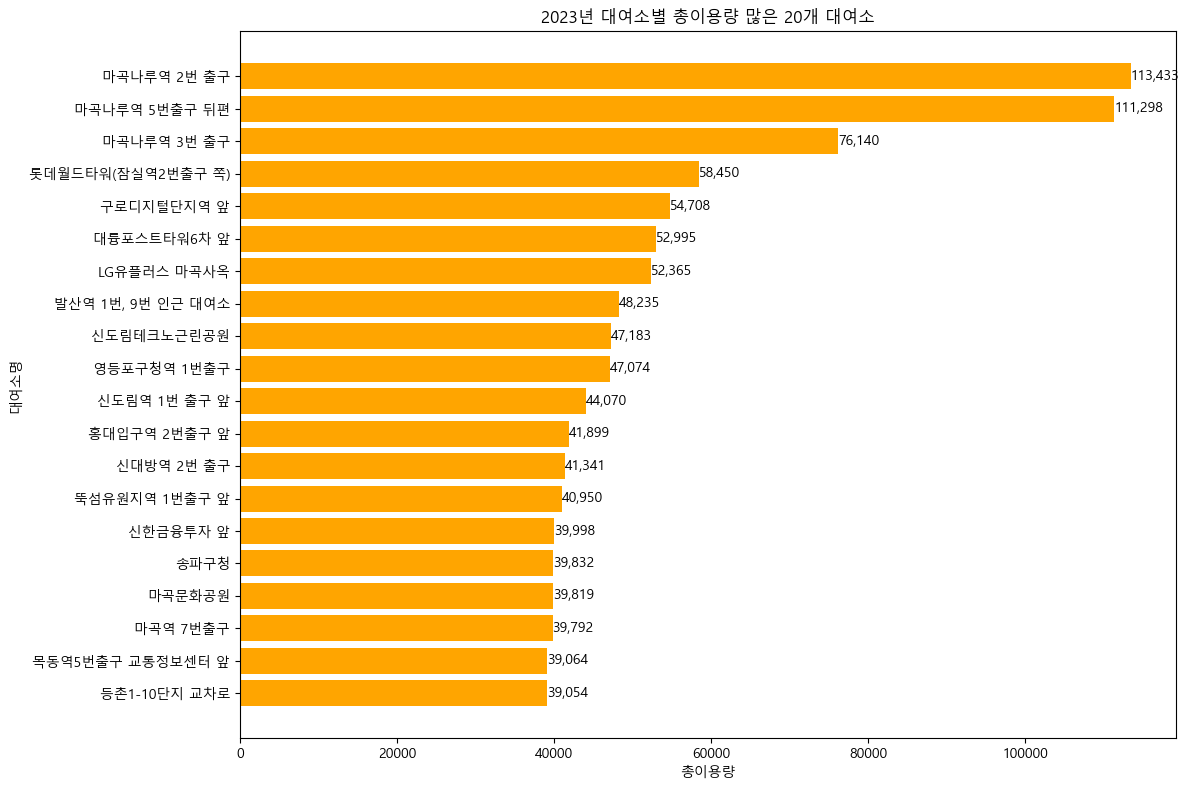

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 가로 막대 그래프 생성
plt.figure(figsize=(12,8))
bars = plt.barh(merge['대여소명'], merge['총이용량'], color='orange')
plt.ylabel('대여소명')
plt.xlabel('총이용량')
plt.title('2023년 대여소별 총이용량 많은 20개 대여소')
plt.gca().invert_yaxis()  # y축을 상하 반전하여 높은 값이 위로 오도록 설정

# 각 막대 끝에 '총이용량' 레이블 추가
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}',
             ha='left', va='center')

plt.tight_layout()
plt.show()

In [49]:
import pandas as pd
import numpy as np
import json

import folium

# 나의 루트 경로 설정
path_dateset = 'G:/내 드라이브/DataSet/'

### 자전거 대여소 정보

In [51]:
rental = pd.read_parquet(path_dateset + '_파킷 파일\\서울시 공공자전거 대여소 정보\\공공자전거 대여소 정보_통합본_최종.parquet')
rental.head()

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,데이터등록월,대여소ID,거치대수
0,06173,서울자동차운전전문학원,강서구,강서구 남부순환로 216,37.546135,126.821060,2024-03-18,NaN,10.0,QR,2024-06,ST-3284,NaN
1,02902,공릉풍림아파트 108동,노원구,서울특별시 노원구 섬밭로 139 공릉풍림아파트,37.628620,127.066910,2020-03-24,NaN,12.0,QR,2024-06,ST-2068,NaN
2,02912,대진고등학교,노원구,서울특별시 노원구 한글비석로 97,37.638157,127.073265,2020-03-23,NaN,20.0,QR,2024-06,ST-2078,NaN
3,02911,상계역중앙시장,노원구,서울특별시 노원구 한글비석로 389-2 가로판매대,37.658871,127.071915,2020-03-23,NaN,7.0,QR,2024-06,ST-2077,NaN
4,02910,도깨비시장,노원구,서울특별시 노원구 동일로 1028 한의학명가,37.621864,127.074051,2020-03-25,NaN,10.0,QR,2024-06,None,NaN


In [52]:
rental[rental['위도'].isnull()]

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,데이터등록월,대여소ID,거치대수
2918,04205,디지털미디어씨티역2번출구,마포구,마포구 상암동 1171-1,NaN,NaN,2020-12-02,NaN,10.0,QR,2021-01,None,NaN


In [53]:
rental = rental[~rental['위도'].isnull()]

In [54]:
rental[rental['위도'].isnull()]

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,데이터등록월,대여소ID,거치대수


### 자치구 정보

In [56]:
geo_path = path_dateset + 'seoul_municipalities_geo_simple.json'
# geo_str = json.load(open(geo_path, encoding='cp949'))
# encoding을 UTF-8로 지정
with open(geo_path, 'rt', encoding='utf-8') as f:
    geo_str2 = json.load(f)
# # ============================

### 지하철역통합

In [58]:
filename = '_최종 병합 파일\\서울교통공사 역주소 및 전화번호\\지하철역통합_20241031.parquet'
df_train_station = pd.read_parquet(path_dateset + filename)
df_train_station.head()

,연번,역번호,호선,역명,역전화번호,도로명주소,지번주소,station_code,seoulmetro_code,external_code,station_name(kor),lat,lng
0,NaN,None,NaN,<NA>,<NA>,<NA>,<NA>,651.0,4703,943,419민주묘지,37.648235,127.008614
1,NaN,None,NaN,<NA>,<NA>,<NA>,<NA>,335.0,1907,109,가능,37.748577,127.044213
2,92.0,340,3.0,가락시장,02-6110-3501,서울특별시 송파구 송파대로 지하257(가락동),서울특별시 송파구 가락동 184-23 가락시장역(3호선),78.0,340,350,가락시장,37.492522,127.118234
3,NaN,None,NaN,<NA>,<NA>,<NA>,<NA>,230.0,1702,P142,가산디지털단지,37.481072,126.882343
4,NaN,None,NaN,<NA>,<NA>,<NA>,<NA>,580.0,4107,907,가양,37.561391,126.854456


In [59]:
have_bikes = rental.groupby('자치구').size()

In [60]:
have_bikes.sort_values(ascending = False, inplace = True)
have_bikes.head()

자치구
송파구     234
강서구     207
강남구     181
영등포구    175
노원구     161
dtype: int64

In [61]:
import ast

text = '"\ub3c4\ubd09\uad6c"'
decoded_text = ast.literal_eval(text)
print(decoded_text)

도봉구


In [62]:
move.head(2)

,자치구,이동인구
0,강남구,87024272.60
1,강동구,43947861.78


In [63]:
# 지도 생성
center = [37.541, 126.986]
# center on Liberty Bell, add marker
bike_map = folium.Map(location=center, zoom_start=13, tiles='openstreetmap', name='OpenStreetMap')

fg0 = folium.FeatureGroup(name="bike_road", show=False).add_to(bike_map)
# GeoJson 스타일 함수 정의
def _style_function(feature):
    return {
        'color': feature['properties'].get('LINE_COLOR', '#3388ff'),  # 기본 색상은 파란색
        #'weight': feature['properties'].get('LINE_WEIGHT', 1),       # 기본 굵기는 2
        'weight': 2,       # 기본 굵기는 2
        'opacity': 0.7
    }
    
_popup = folium.GeoJsonPopup(
    fields=["CONTENTS_NAME", "ADDR_NEW"],
    aliases=["CONTENTS_NAME", "ADDR_NEW"],
    localize=True,
    labels=True,
    style="background-color: yellow;",
)
_tooltip = folium.GeoJsonTooltip(
    fields=["CONTENTS_NAME", "SUB_NAME"],
    aliases=["CONTENTS_NAME:", "SUB_NAME"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)



fl_f.folium_Circle(_data = rental, _name = 'bike_rental', _map = bike_map, _show = False, _radius = 100, \
                  _color = 'black', _fill = False, _fill_color = 'blue', _fill_opacity = 0.5, _popup = '대여소번호', tooltip = '대여소명')
# fg1 = folium.FeatureGroup(name="bike_rental", show=False).add_to(bike_map)
# # 자전거 대여소 표시
# for i, row in rental.iterrows():
#   # folium.Marker(
#     #folium.CircleMarker(
#     folium.Circle(
#       location = [row['위도'], row['경도']],
#       radius = 100,
#       color='black',                  # 외곽선 색상
#       fill=False,                     # 채우기 여부
#       fill_color='blue',             # 채우기 색상
#       fill_opacity=0.5,              # 채우기 불투명도
#       popup=row['대여소번호'],             # 클릭 시 표시되는 팝업
#       tooltip=row['대여소명'],                 # 마우스 오버 시 표시되는 툴팁
#       #icon=folium.Icon(icon = 'bookmark', color = 'blue')
#   ).add_to(fg1)


# 2024.11.12 dzP
fl_f.folium_Circle(_data = top_20_short, _name = '부족량 top20', _map = bike_map, _show = False, _radius = 100, \
                  _color = 'black', _fill = False, _fill_color = 'teal', _fill_opacity = 0.8, _popup = '대여소번호', tooltip = '대여소명')
# fg2 = folium.FeatureGroup(name="부족량 top20", show=False).add_to(bike_map)
# # 부족량 top20 자전거 대여소 표시
# for i, row in top_20_short.iterrows():
#   # folium.Marker(
#     #folium.CircleMarker(
#     folium.Circle(
#       location = [row['위도'], row['경도']],
#       radius = 100,
#       color='black',                  # 외곽선 색상
#       fill=False,                     # 채우기 여부
#       fill_color='teal',             # 채우기 색상
#       fill_opacity=0.8,              # 채우기 불투명도
#       popup=row['대여소번호'],             # 클릭 시 표시되는 팝업
#       tooltip=row['대여소명'],                 # 마우스 오버 시 표시되는 툴팁
#       #icon=folium.Icon(icon = 'bookmark', color = 'blue')
#   ).add_to(fg2)

# 2024.11.12 dzP
fl_f.folium_Circle(_data = zero_st_counts_top_20, _name = "거치수량 '0' top20", _map = bike_map, _show = False, _radius = 100, \
                  _color = 'black', _fill = False, _fill_color = 'orange', _fill_opacity = 0.8, _popup = '대여소번호', tooltip = '대여소명_x')
# fg3 = folium.FeatureGroup(name="거치수량 '0' top20", show=False).add_to(bike_map)
# # 거치수량 '0' top20 자전거 대여소 표시
# for i, row in zero_st_counts_top_20.iterrows():
#   # folium.Marker(
#     #folium.CircleMarker(
#     folium.Circle(
#       location = [row['위도'], row['경도']],
#       radius = 100,
#       color='black',                  # 외곽선 색상
#       fill=False,                     # 채우기 여부
#       fill_color='orange',         # 채우기 색상
#       fill_opacity=0.8,              # 채우기 불투명도
#       popup=row['대여소번호'],             # 클릭 시 표시되는 팝업
#       tooltip=row['대여소명_x'],                 # 마우스 오버 시 표시되는 툴팁
#       #icon=folium.Icon(icon = 'bookmark', color = 'blue')
#   ).add_to(fg3)

# 2024.11.12 dzP
fl_f.folium_Circle(_data = merge, _name = "이용량 많은 곳 top20", _map = bike_map, _show = False, _radius = 100, \
                  _color = 'black', _fill = False, _fill_color = 'violet', _fill_opacity = 0.8, _popup = '대여소번호', tooltip = '대여소명')
# fg4 = folium.FeatureGroup(name="이용량 많은 곳 top20", show=False).add_to(bike_map)
# # 이용량 많은 곳 top20 자전거 대여소 표시
# for i, row in merge.iterrows():
#   # folium.Marker(
#     #folium.CircleMarker(
#     folium.Circle(
#       location = [row['위도'], row['경도']],
#       radius = 100,
#       color='black',                  # 외곽선 색상
#       fill=False,                     # 채우기 여부
#       fill_color='violet',            # 채우기 색상
#       fill_opacity=0.8,              # 채우기 불투명도
#       popup=row['대여소번호'],             # 클릭 시 표시되는 팝업
#       tooltip=row['대여소명'],                 # 마우스 오버 시 표시되는 툴팁
#       #icon=folium.Icon(icon = 'bookmark', color = 'blue')
#   ).add_to(fg4)

# 2024.11.12 dzP
df_train_station.rename(columns = {'lat':'위도', 'lng':'경도'}, inplace = True)
fl_f.folium_CircleMarker(_data = df_train_station, _name = 'train_station', _map = bike_map, _show = True, _radius = 2, \
                    _color = 'yellow', _fill = True, _fill_color = 'yellow', _fill_opacity = 0.6, _popup = '역번호', tooltip = '역명')
# fg5 = folium.FeatureGroup(name="train_station", show=False).add_to(bike_map)
# # 지하철역 표시
# for i, row in df_train_station.iterrows():
#   folium.CircleMarker(
#       location = [row['lat'], row['lng']],
#       radius=2,                     # 반지름 (픽셀 단위)
#       color='yellow',                  # 외곽선 색상
#       fill=True,                     # 채우기 여부
#       fill_color='yellow',             # 채우기 색상
#       fill_opacity=0.6,              # 채우기 불투명도
#       popup=row[' seoulmetro_code'],             # 클릭 시 표시되는 팝업
#       tooltip=row[' station_name(kor)']                 # 마우스 오버 시 표시되는 툴팁      
#   ).add_to(fg5)


# 2024.11.12 dzP
choropleth1 = fl_f.folium_gu_density(fl_f.seoul_municipalities_geo_simple(), move, '자치구별_이동인구', 'Blues', 0.3, _columns=['자치구', '이동인구'])
choropleth1.add_to(bike_map)
# # 자치구 구분 표
# geo_str2 = json.load(open('G:\\내 드라이브\\DataSet\\seoul_municipalities_geo_simple.json', encoding='utf-8'))
# choropleth = folium.Choropleth(geo_data = geo_str2,
#                   data = move,
#                   columns=['자치구', '이동인구'],
#                   key_on = 'feature.properties.SIG_KOR_NM',
#                   fill_color = 'Blues',
#                   fill_opacity=0.3              # 채우기 불투명도
                # )

# 1. GeoJsonTooltip을 사용하는 방법:
# folium.GeoJsonTooltip(fields=['SIG_ENG_NM'],
#                       aliases=['지역:'],
#                       style=('background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;')
# ).add_to(choropleth.geojson)
# 2. GeoJsonPopup을 사용하는 방법:
folium.GeoJsonPopup(fields=['SIG_KOR_NM'],
                    aliases=['지역:'],
                    style='font-weight: bold;'
).add_to(choropleth.geojson)
choropleth.add_to(bike_map)

#folium.TileLayer('openstreetmap', name='OpenStreetMap').add_to(bike_map)
folium.TileLayer('cartodbpositron', name='CartoDB Positron').add_to(bike_map)
folium.TileLayer('cartodbdark_matter', name='CartoDB Dark Matter').add_to(bike_map)

folium.LayerControl().add_to(bike_map)

# jupyter 에서 곧장 지도 표시하기
#bike_map

# web에서 표시하기
# 지도 저장
bike_map.save("(folium)유동인구_지하철역지도추가_부족량top20_거치대수량'0'top20_이용량많은곳top20_2023" + ".html")
import webbrowser
webbrowser.open("(folium)유동인구_지하철역지도추가_부족량top20_거치대수량'0'top20_이용량많은곳top20_2023" + ".html")

TypeError: folium_gu_density() got an unexpected keyword argument '_columns'